In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("vehicle.csv")
data.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axisrectangular,lengthrectangular,majorvariance,minorvariance,gyrationradius,majorskewness,minorskewness,minorkurtosis,majorkurtosis,hollows_ratio,class
0,95,43,96,202,65,10,189,35,22,143,217,534,166,71,6,27,190,197,opel
1,96,52,104,222,67,9,198,33,23,163,217,589,226,67,12,20,192,201,opel
2,107,52,101,218,64,11,202,33,23,164,219,610,192,65,17,2,197,206,opel
3,97,37,78,181,62,8,161,41,20,131,182,389,117,62,2,28,203,211,opel
4,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194,opel


In [3]:
data.iloc[:,0:4].corr()

,compactness,circularity,distance_circularity,radius_ratio
compactness,1.000000,0.692869,0.792444,0.691659
circularity,0.692869,1.000000,0.798492,0.622778
distance_circularity,0.792444,0.798492,1.000000,0.771644
radius_ratio,0.691659,0.622778,0.771644,1.000000


(array([ 1.,  1.,  6., 17., 32., 37., 45., 76., 94., 81., 70., 62., 30.,
        60., 43., 40., 45., 36., 19., 28., 11.,  5.,  4.,  2.,  1.]),
 array([ 73.  ,  74.84,  76.68,  78.52,  80.36,  82.2 ,  84.04,  85.88,
         87.72,  89.56,  91.4 ,  93.24,  95.08,  96.92,  98.76, 100.6 ,
        102.44, 104.28, 106.12, 107.96, 109.8 , 111.64, 113.48, 115.32,
        117.16, 119.  ]),
 <BarContainer object of 25 artists>)

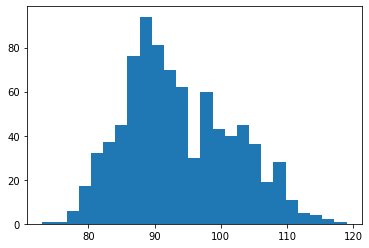

In [4]:
plt.hist(data.iloc[:,0], bins = 25)

{'whiskers': [<matplotlib.lines.Line2D at 0x1be8bb75ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x1be8bb8a198>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be8bb758d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1be8bb8a748>,
 'fliers': [<matplotlib.lines.Line2D at 0x1be8bb8aa20>,
 'means': []}

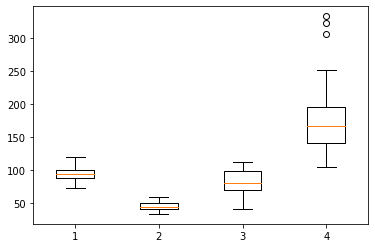

In [5]:
plt.boxplot(data.iloc[:,0:4])

In [6]:
Y = pd.Series(data.iloc[:,-1])
X = pd.DataFrame(data.iloc[:,0:len(data.columns)-1])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.66, random_state = 1)

In [8]:
maxdepth = [2,5,10,15,20]
trainAcc = []
testAcc = []

In [9]:
for i in maxdepth:
    dclf = tree.DecisionTreeClassifier(max_depth = i)
    dclf = dclf.fit(X_train, Y_train)
    Y_predict_train = dclf.predict(X_train)
    Y_predict_test = dclf.predict(X_test)
    a_train = accuracy_score(Y_train,Y_predict_train)
    a_test = accuracy_score(Y_test,Y_predict_test)
    trainAcc.append(a_train)
    testAcc.append(a_test)

In [11]:
print("Train accuracy for levels 2,5,10,15,20", trainAcc)
print("Test accuracy for levels 2,5,10,15,20" , testAcc)

Train accuracy for levels 2,5,10,15,20 [0.5993031358885017, 0.8606271777003485, 0.9930313588850174, 1.0, 1.0]
Test accuracy for levels 2,5,10,15,20 [0.47942754919499103, 0.6762075134168157, 0.6815742397137746, 0.6923076923076923, 0.6797853309481217]


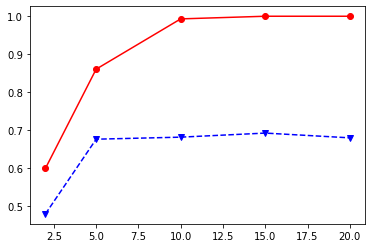

In [12]:
plt.plot(maxdepth,trainAcc,'ro-',maxdepth, testAcc,'bv--')